In [1]:
%load_ext sql

In [2]:
%sql postgresql://appdev@data2/appdev

'Connected: appdev@appdev'

In [5]:
%sql select * from geonames order by population desc limit 1

1 rows affected.


geonameid,name,longitude,latitude,feature_class,feature_code,country_code,admin1_code,admin2_code,population,elevation,timezone
305104,Levant,36.0,34.0,L,RGN,None,None,None,44990000,None,Asia/Beirut


In [12]:
%sql create view big_pop as select * from geonames order by population desc limit 1

Done.


[]

In [18]:
%sql create view big_pop_point as select point(big_pop.longitude, big_pop.latitude) from big_pop

Done.


[]

In [21]:
%sql select  point(geonames.longitude, geonames.latitude) <-> (select * from big_pop_point) as distance from geonames limit 5

5 rows affected.


distance
35.5187260391022
35.5403912827645
35.4976906065648
35.5211340049413
35.5230848613757


In [22]:
%%sql
-- Haversine Formula based geodistance in miles (constant is diameter of Earth in miles)
-- Based on a similar PostgreSQL function found here: https://gist.github.com/831833
-- Updated to use distance formulas found here: http://www.codecodex.com/wiki/Calculate_distance_between_two_points_on_a_globe
CREATE OR REPLACE FUNCTION public.geodistance(alat double precision, alng double precision, blat double precision, blng double precision)
  RETURNS double precision AS
$BODY$
SELECT asin(
  sqrt(
    sin(radians($3-$1)/2)^2 +
    sin(radians($4-$2)/2)^2 *
    cos(radians($1)) *
    cos(radians($3))
  )
) * 7926.3352 AS distance;
$BODY$
  LANGUAGE sql IMMUTABLE
  COST 100;

Done.


[]

In [25]:
%%sql 
select geodistance(geonames.latitude, geonames.longitude, big_pop.latitude, big_pop.longitude)
from geonames, big_pop order by geodistance desc limit 5

5 rows affected.


geodistance
11715.8987043352
11713.6888161383
11670.2402692639
11442.0459098265
11309.5337147678


In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [27]:
%sql select name, population from geonames order by population desc limit 1000

1000 rows affected.


name,population
Levant,44990000
Democratic Socialist Republic of Sri Lanka,21513990
Rio de Janeiro,15993583
Rangpur Division,15787758
Republic of Kazakhstan,15340000
Illinois,12772888
Republic of Senegal,12323252
Mexico City,12294193
Thane,11060148
Rostovskaya Oblast’,4397303


1000 rows affected.


1000 rows affected.


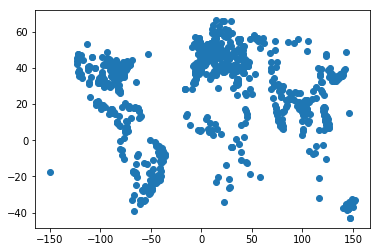

In [34]:
result = %sql SELECT longitude,latitude FROM geonames ORDER BY population DESC LIMIT 1000;
data = np.array(result)
x, y = data.T

plt.scatter(x,y)
plt.show()

In [48]:
%%sql 
select data->'name' from cards 
        where data #> '{artist}' = '"Rob Alexander"'
        

401 rows affected.


?column?
Beacon of Immortality
Kavu Climber
Llanowar Wastes
Shivan Reef
Sulfurous Springs
Treetop Village
Plains
Forest
Badlands
Lance


In [60]:
%%sql 
select data from cards 
        limit 1

1 rows affected.


data
"{'id': 'ab1ab474019e4e76c66e2b524d354cb7c3212616', 'cmc': 7, 'name': ""Ancestor's Chosen"", 'text': ""First strike (This creature deals combat damage before creatures without first strike.)\nWhen Ancestor's Chosen enters the battlefield, you gain 1 life for each card in your graveyard."", 'type': 'Creature — Human Cleric', 'power': '4', 'types': ['Creature'], 'artist': 'Pete Venters', 'colors': ['White'], 'flavor': '""The will of all, by my hand done.""', 'layout': 'normal', 'number': '1', 'rarity': 'Uncommon', 'manaCost': '{5}{W}{W}', 'subtypes': ['Human', 'Cleric'], 'imageName': ""ancestor's chosen"", 'mciNumber': '1', 'toughness': '4', 'multiverseid': 130550, 'colorIdentity': ['W']}"


In [67]:
%%sql 
select count(data), data->'colors' as "colors" from cards 
    group by (data->'colors')
    order by count(data) desc

32 rows affected.


count,colors
7391,None
4977,['Green']
4877,['Black']
4858,['Red']
4755,['White']
4680,['Blue']
276,"['White', 'Green']"
273,"['Red', 'Green']"
260,"['Blue', 'Black']"
258,"['Black', 'Red']"


In [86]:
%%sql
select jsonb_array_elements_text(data->'colors') as "color", count(*)
    from cards
        group by color


5 rows affected.


color,count
Black,6067
Blue,5836
Green,6162
Red,6054
White,5920
